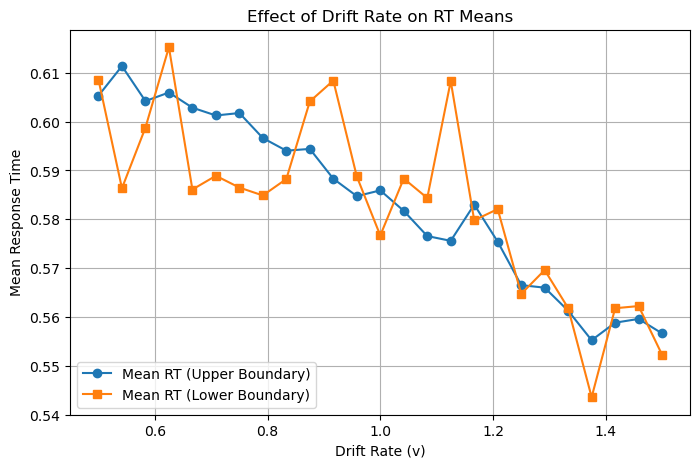

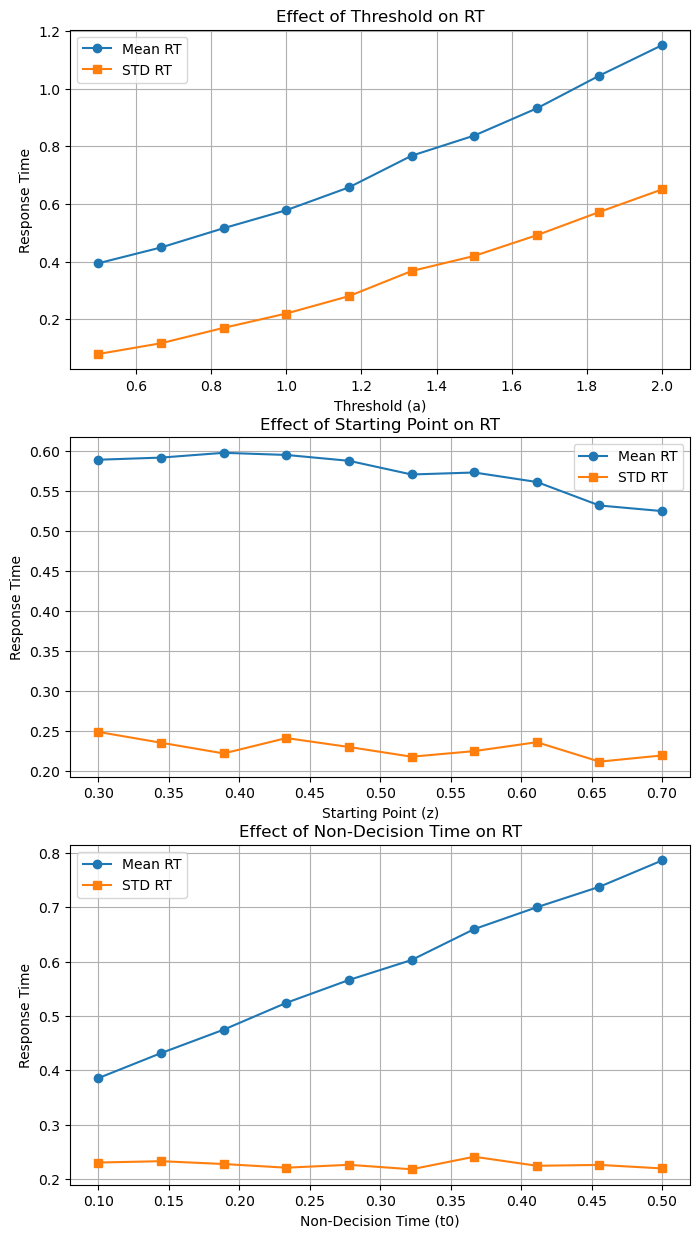

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_ddm(v, a=1.0, z=0.5, t0=0.3, dt=0.01, N=2000):
    """
    Simulates N trials of the Drift-Diffusion Model (DDM).
    - v: Drift rate
    - a: Threshold
    - z: Starting point (fraction of a)
    - t0: Non-decision time
    - dt: Time step
    - N: Number of trials
    """
    z = z * a  # Convert z to absolute value within boundaries
    rt = np.zeros(N)  # Response times
    choice = np.zeros(N)  # 1 for upper, 0 for lower

    for i in range(N):
        x = z  # Start at z
        t = 0  # Time counter

        while 0 < x < a:
            x += v * dt + np.sqrt(dt) * np.random.randn()
            t += dt

        rt[i] = t + t0
        choice[i] = 1 if x >= a else 0  # Upper boundary = 1, Lower boundary = 0

    return rt, choice

# Vary drift rate and compute RT statistics
drift_rates = np.linspace(0.5, 1.5, 25)
results = []

for v in drift_rates:
    rt, choice = simulate_ddm(v)
    mean_rt_upper = np.mean(rt[choice == 1])
    mean_rt_lower = np.mean(rt[choice == 0])
    results.append([v, mean_rt_upper, mean_rt_lower])

df_drift = pd.DataFrame(results, columns=["Drift Rate", "Mean RT Upper", "Mean RT Lower"])

# Plot mean RTs
plt.figure(figsize=(8,5))
plt.plot(df_drift["Drift Rate"], df_drift["Mean RT Upper"], label="Mean RT (Upper Boundary)", marker='o')
plt.plot(df_drift["Drift Rate"], df_drift["Mean RT Lower"], label="Mean RT (Lower Boundary)", marker='s')
plt.xlabel("Drift Rate (v)")
plt.ylabel("Mean Response Time")
plt.title("Effect of Drift Rate on RT Means")
plt.legend()
plt.grid(True)
plt.show()

# Varying Threshold (a)
thresholds = np.linspace(0.5, 2.0, 10)
results_a = []
for a in thresholds:
    rt, choice = simulate_ddm(v=1.0, a=a)
    results_a.append([a, np.mean(rt), np.std(rt)])
df_threshold = pd.DataFrame(results_a, columns=["Threshold (a)", "Mean RT", "STD RT"])

# Varying Starting Point (z)
starting_points = np.linspace(0.3, 0.7, 10)
results_z = []
for z in starting_points:
    rt, choice = simulate_ddm(v=1.0, z=z)
    results_z.append([z, np.mean(rt), np.std(rt)])
df_starting_point = pd.DataFrame(results_z, columns=["Starting Point (z)", "Mean RT", "STD RT"])

# Varying Non-Decision Time (t0)
non_decision_times = np.linspace(0.1, 0.5, 10)
results_t0 = []
for t0 in non_decision_times:
    rt, choice = simulate_ddm(v=1.0, t0=t0)
    results_t0.append([t0, np.mean(rt), np.std(rt)])
df_t0 = pd.DataFrame(results_t0, columns=["Non-Decision Time (t0)", "Mean RT", "STD RT"])

# Plot results
fig, ax = plt.subplots(3, 1, figsize=(8, 15))

# Threshold effects
ax[0].plot(df_threshold["Threshold (a)"], df_threshold["Mean RT"], label="Mean RT", marker='o')
ax[0].plot(df_threshold["Threshold (a)"], df_threshold["STD RT"], label="STD RT", marker='s')
ax[0].set_xlabel("Threshold (a)")
ax[0].set_ylabel("Response Time")
ax[0].set_title("Effect of Threshold on RT")
ax[0].legend()
ax[0].grid(True)

# Starting Point effects
ax[1].plot(df_starting_point["Starting Point (z)"], df_starting_point["Mean RT"], label="Mean RT", marker='o')
ax[1].plot(df_starting_point["Starting Point (z)"], df_starting_point["STD RT"], label="STD RT", marker='s')
ax[1].set_xlabel("Starting Point (z)")
ax[1].set_ylabel("Response Time")
ax[1].set_title("Effect of Starting Point on RT")
ax[1].legend()
ax[1].grid(True)

# Non-Decision Time effects
ax[2].plot(df_t0["Non-Decision Time (t0)"], df_t0["Mean RT"], label="Mean RT", marker='o')
ax[2].plot(df_t0["Non-Decision Time (t0)"], df_t0["STD RT"], label="STD RT", marker='s')
ax[2].set_xlabel("Non-Decision Time (t0)")
ax[2].set_ylabel("Response Time")
ax[2].set_title("Effect of Non-Decision Time on RT")
ax[2].legend()
ax[2].grid(True)

plt.show()


Observations from Parameter Variations:

Threshold (a) Effects:
Increasing a increases both the mean and standard deviation of RT.
This is expected because a higher threshold means more evidence is needed for a decision, leading to longer and more variable RTs.

Starting Point (z) Effects:
When z is closer to the upper boundary, mean RT decreases.
When z is closer to the lower boundary, mean RT increases.
This follows from the fact that the decision process starts with an initial bias toward one boundary.

Non-Decision Time (t0​) Effects:
Increasing t0​ shifts RT distributions upward without affecting their spread.
Since t0​ represents time unrelated to decision-making, it simply adds a constant delay.